In [194]:
import pandas as pd
from sklearn.model_selection import train_test_split



import pandas as pd
data = pd.read_csv('update 2.csv')

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd
import time
t0= time.clock()


y = data['Total Displacement [mm]']
X = data.drop(['Total Displacement [mm]'], axis=1)
# Divide data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95, test_size=0.05, random_state=47)

sc_X = StandardScaler()
sc_X.fit(X_train) 
X_trainscaled=sc_X.transform(X_train)
X_testscaled=sc_X.transform(X_test)

reg = MLPRegressor(hidden_layer_sizes=(64,64,32, 32,16 ),activation="tanh" ,random_state=1, max_iter=20000000).fit(X_trainscaled, y_train)

y_pred=reg.predict(X_testscaled)
print("The Score with ", (r2_score(y_pred, y_test)))
t1 = time.clock() - t0
print("Time elapsed: ", t1) # CPU seconds elapsed (floating point)


The Score with  0.9947858666064133
Time elapsed:  1.819749999999999


In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# model.fit(X_train, y_train)
scores = cross_val_score(reg, X_trainscaled, y_train, scoring='r2', cv=5)
scores

array([0.99656486, 0.996452  , 0.99440329, 0.99634943, 0.99551934])

In [195]:
xp = 0.9;
p = 270;
df1 = pd.DataFrame(data=None,columns=[ 'Length [mm]','Applied Load [N]','Load Position'])
for i in range(0, 1010, 10):
  df1 = df1.append(pd.DataFrame([[i,p,xp]], columns=['Length [mm]','Applied Load [N]','Load Position']))

df2 = sc_X.transform(df1)
df = pd.DataFrame(df2, columns=df1.columns)
defq = 0-reg.predict(df)

forcepd = pd.DataFrame(defq, columns = ['Total Displacement [mm]'])
j= forcepd['Total Displacement [mm]'].iloc[:101]
 
df['Total Displacement [mm]']=j.values
# df['Total Displacement [mm]']=forcepd['Total Displacement [mm]']
# result = pd.concat([df, forcepd], axis=1)
df

,Length [mm],Applied Load [N],Load Position,Total Displacement [mm]
0,-1.752490,-0.594468,1.054355,0.014956
1,-1.717787,-0.594468,1.054355,0.012378
2,-1.683083,-0.594468,1.054355,0.009755
3,-1.648380,-0.594468,1.054355,0.007086
4,-1.613676,-0.594468,1.054355,0.004368
...,...,...,...,...
96,1.579046,-0.594468,1.054355,-0.692471
97,1.613749,-0.594468,1.054355,-0.701729
98,1.648453,-0.594468,1.054355,-0.710813
99,1.683156,-0.594468,1.054355,-0.719721


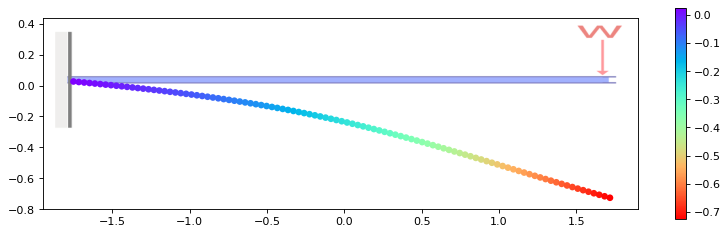

In [176]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import matplotlib.image as mpimg
india_img=mpimg.imread('beam.png')
plt.figure(figsize=(12, 3.5), dpi=80)
plt.imshow(india_img, extent=[-01.95, 1.90, -0.8, 0.44], alpha=0.5)
cmap = mpl.colors.ListedColormap(['red', 'green', 'blue', 'cyan'])

points = plt.scatter(df['Length [mm]'],df['Total Displacement [mm]'],c=df['Total Displacement [mm]'],cmap='rainbow_r',lw=0)

plt.colorbar(points)
plt.show()

In [79]:
data.describe()

,Length [mm],Applied Load [N],Total Displacement [mm],Load Position
count,2505.000000,2505.000000,2505.000000,2505.000000
mean,496.007984,299.600798,0.179940,0.552096
std,289.309716,141.590126,0.247942,0.278812
min,0.000000,100.000000,0.000000,0.200000
25%,250.000000,200.000000,0.020300,0.400000
50%,500.000000,300.000000,0.075300,0.600000
75%,750.000000,400.000000,0.236480,0.800000
max,1000.000000,500.000000,1.579100,1.000000
